In [ ]:
#Sentiment Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download ('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sudik_000\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.test import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomFOrestClassifier
from sklearn.metrics import confusion_matrix, ConsionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisonTreeClassifier
from xgboost import XBGClassifier
import pickle
import re

ModuleNotFoundError: No module named 'sklearn.feature_extraction.test'

In [4]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
from wordcloud import WordCloud
print("WordCloud module imported successfully!")


WordCloud module imported successfully!


In [6]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
from xgboost import XGBClassifier
print("XGBoost module imported successfully!")


XGBoost module imported successfully!


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer  # Correct import
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier  # Fixed typo in RandomFOrestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # Fixed typo in ConsionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier  
from xgboost import XGBClassifier 
import pickle
import re


In [9]:
#EDA

In [10]:
data = pd.read_csv("amazon_alexa.tsv", delimiter =  '\t', quoting = 3)
print(f"Dataset shape : {data.shape}")

Dataset shape : (3150, 5)


In [11]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [12]:
#coloumn name
print(f"Feature names : {data.columns.values}")

Feature names : ['rating' 'date' 'variation' 'verified_reviews' 'feedback']


In [13]:
#Checking for null value
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [14]:
#Getting the record where 'Verified_reviews' is null

data[data['verified_reviews'].isna() == True]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [15]:
#drop this record

data.dropna(inplace = True)

In [16]:
print(f"Dataset shape : {data.shape}")

Dataset shape : (3149, 5)


In [17]:
#Creating new column whe the lenght of string is mentioned

data['length'] = data['verified_reviews'].apply(len)

In [18]:
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [19]:
#random check

print(f"Verified_reviews' column value: {data.iloc[10]['verified_reviews']}")
print(f"Length of review : {len(data.iloc[10]['verified_reviews'])}")
print(f"'length'column value : {data.iloc[10]['length']}")
      

Verified_reviews' column value: "I sent it to my 85 year old Dad, and he talks to it constantly."
Length of review : 65
'length'column value : 65


In [20]:
data.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
length               int64
dtype: object

In [21]:
len(data)

3149

In [22]:
#Analyzing rating columns
print(f"Rating value count: \n{data['rating'].value_counts()}")

Rating value count: 
5    2286
4     455
1     161
3     152
2      95
Name: rating, dtype: int64


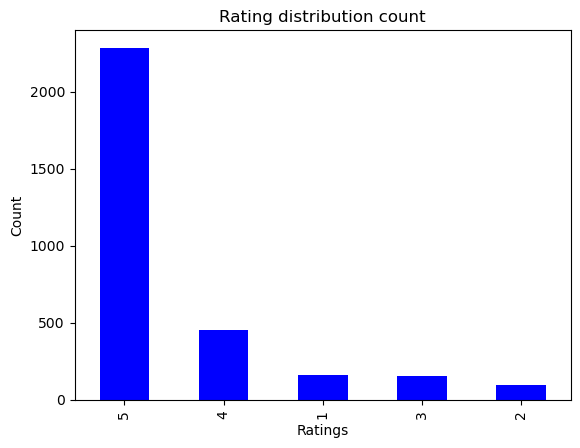

In [23]:
#Bar plot to visulize the total counts of each rating

data['rating'].value_counts().plot.bar(color = 'blue')
plt.title('Rating distribution count')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

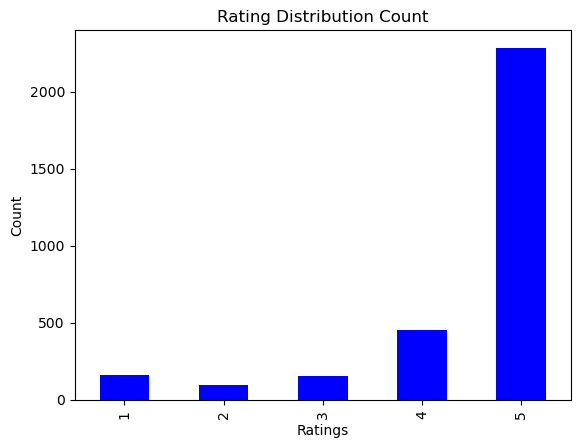

In [24]:
# Sort the ratings in ascending order and plot
data['rating'].value_counts().sort_index().plot.bar(color='blue')

plt.title('Rating Distribution Count')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()


In [25]:
#Finding the percentage of each rating

print(f"Rating value count - precentage distribution: \n{round(data['rating'].value_counts()/data.shape[0]*100,2)}")


Rating value count - precentage distribution: 
5    72.59
4    14.45
1     5.11
3     4.83
2     3.02
Name: rating, dtype: float64


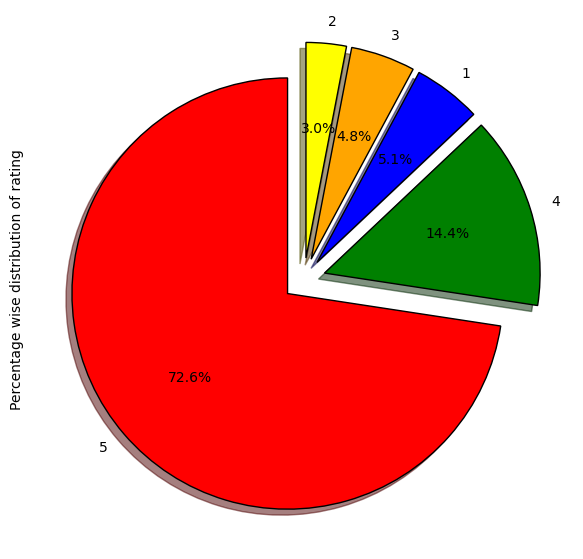

In [26]:
#Pie chart

fig = plt.figure(figsize=(7,7))
colors = ('red','green','blue','orange','yellow')
wp= {'linewidth':1 , "edgecolor":'black'}
tags = data['rating'].value_counts()/data.shape[0]
explode = (0.1,0.1,0.1,0.1,0.1)
tags.plot(kind='pie' , autopct = "%1.1f%%" , shadow = True , colors = colors ,startangle = 90 , wedgeprops = wp, explode=explode, label= 'Percentage wise distribution of rating')
from io import BytesIO
graph = BytesIO()
fig.savefig(graph, format = "png")

# ##Analyzing 'feedback' column

In [27]:
#distinct values of 'feedback' and its count
print(f"Feedback value count: \n{data['feedback'].value_counts()}")

Feedback value count: 
1    2893
0     256
Name: feedback, dtype: int64


In [28]:
#to check if 0 means bad and 1 means good
rev0 = data[data['feedback'] == 0].iloc[1]['verified_reviews']
print(rev0)

Sound is terrible if u want good music too get a bose


In [30]:
rev1 = data[data['feedback'] == 1].iloc[1]['verified_reviews']
print(rev1)

Loved it!


In [32]:
#bar graph 
data['feedback'].value_counts().plots.bar(color = 'blue')
plt.title('Feedback distribution count')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()

AttributeError: 'Series' object has no attribute 'plots'

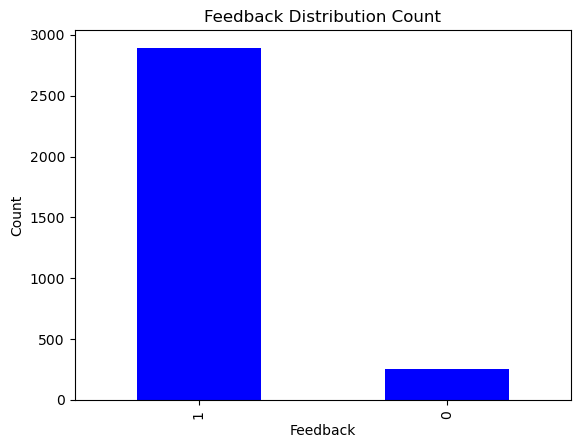

In [33]:
data['feedback'].value_counts().plot.bar(color='blue')
plt.title('Feedback Distribution Count')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()

In [38]:
#percentage distribution
print(f"Feedback value count - percentage distribution: \n{round(data['feedback'].value_counts()/data.shape[0]*100,5)}")

Feedback value count - percentage distribution: 
1    91.87044
0     8.12956
Name: feedback, dtype: float64


<AxesSubplot:ylabel='Percentage'>

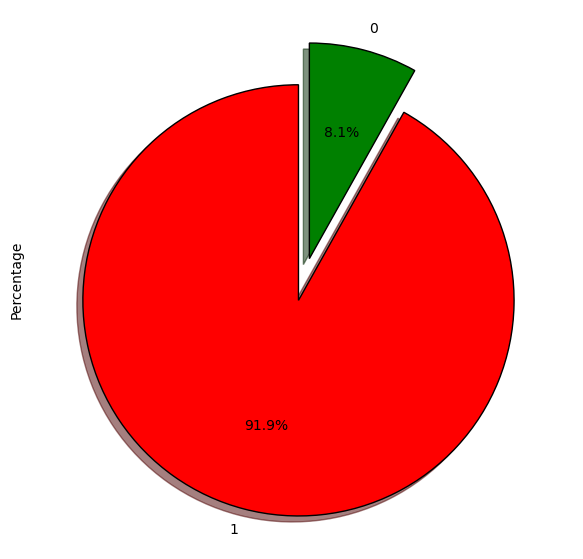

In [41]:
#pie chart
fig = plt.figure(figsize=(7,7))
colors = ('red' , 'green')
wp = {'linewidth': 1, "edgecolor" : 'black'}
tags = data['feedback'].value_counts()/data.shape[0]
explode = (0.1,0.1)
tags.plot(kind='pie' , autopct="%1.1f%%", shadow = True , colors = colors , startangle = 90,wedgeprops=wp , explode = explode,label='Percentage')

In [42]:
data[data['feedback'] == 0]['rating'].value_counts()

1    161
2     95
Name: rating, dtype: int64

In [43]:
data[data['feedback'] == 1]['rating'].value_counts()

5    2286
4     455
3     152
Name: rating, dtype: int64

In [44]:
## Analysing variations
print(f"Variations:\n{data['variation'].value_counts()}")

Variations:
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64


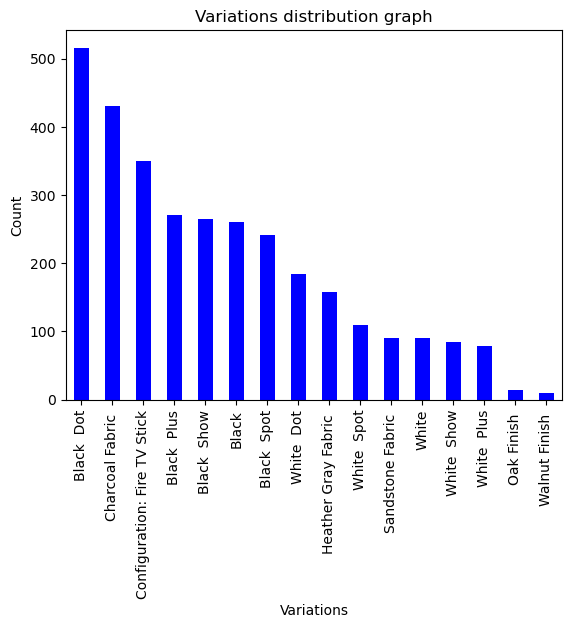

In [46]:
data['variation'].value_counts().plot.bar(color = 'blue')
plt.title('Variations distribution graph')
plt.xlabel('Variations')
plt.ylabel('Count')
plt.show()


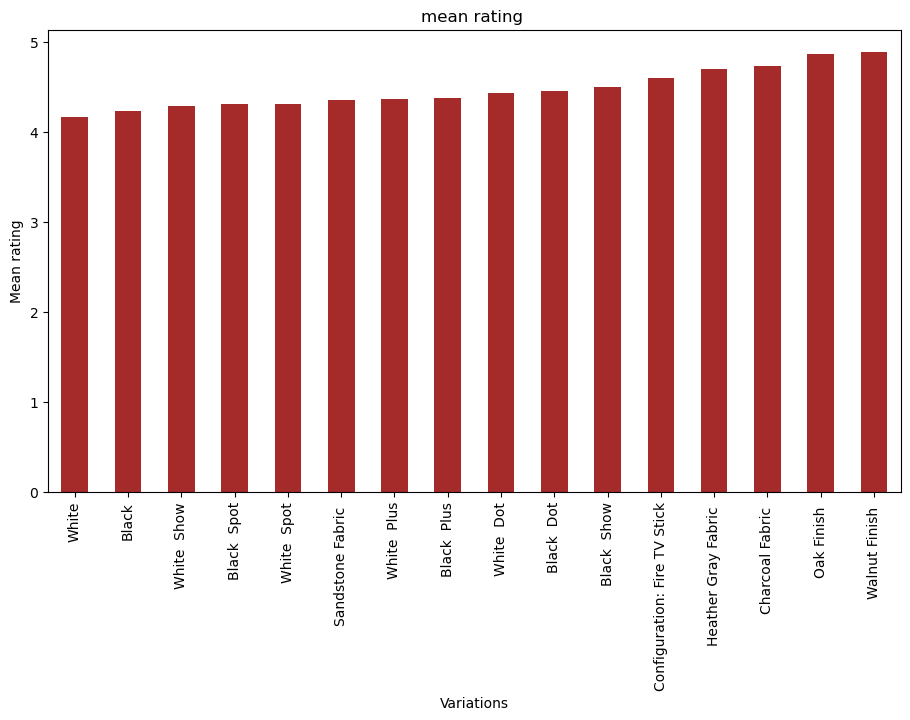

In [47]:
data.groupby('variation')['rating'].mean().sort_values().plot.bar(color = 'brown' , figsize = (11,6))
plt.title('mean rating ')
plt.xlabel('Variations')
plt.ylabel('Mean rating')
plt.show()


In [48]:
data['length'].describe()

count    3149.000000
mean      132.714513
std       182.541531
min         1.000000
25%        30.000000
50%        74.000000
75%       166.000000
max      2853.000000
Name: length, dtype: float64

[Text(0.5, 1.0, 'Distrubution of length of review')]

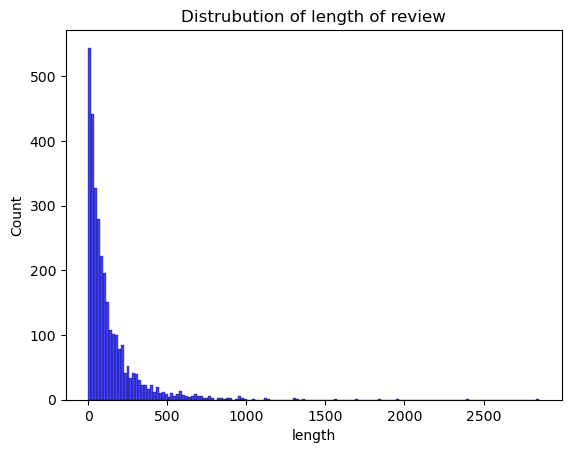

In [50]:
sns.histplot(data['length'],color = 'blue').set(title = 'Distrubution of length of review')

[Text(0.5, 1.0, 'Distrubution of length of review if feedback is 0')]

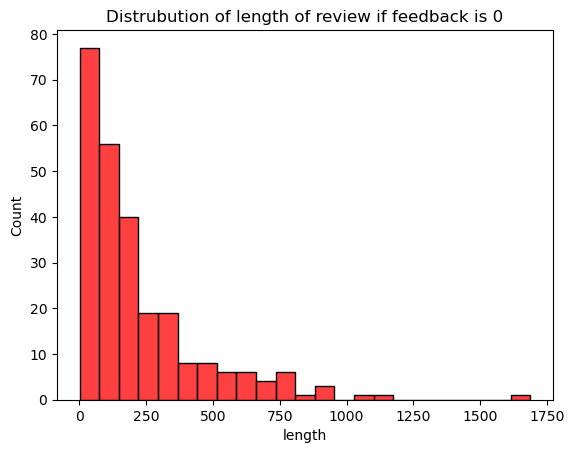

In [51]:
sns.histplot(data[data['feedback']==0]['length'],color = 'red').set(title = 'Distrubution of length of review if feedback is 0')

[Text(0.5, 1.0, 'Distrubution of length of review if feedback is 1')]

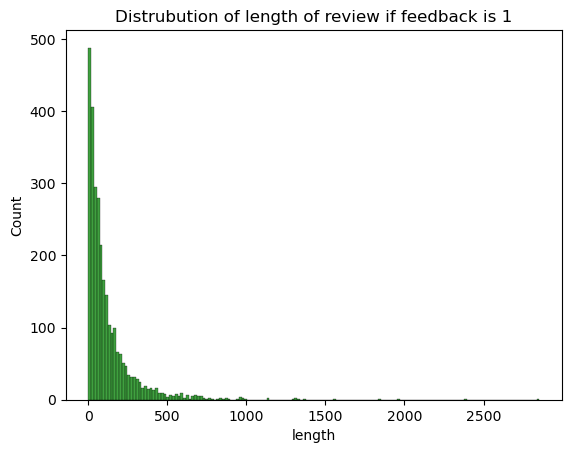

In [52]:
sns.histplot(data[data['feedback']==1]['length'],color = 'green').set(title = 'Distrubution of length of review if feedback is 1')

In [54]:
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data.verified_reviews)

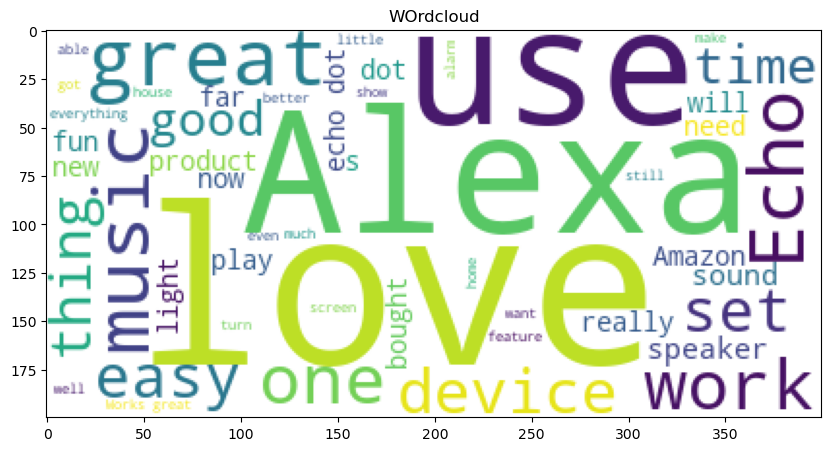

In [56]:
#Combine all reviews
reviews = " ".join([review for review in data['verified_reviews']])

#Initialize wordcloud
wc = WordCloud(background_color = 'white' ,max_words= 50)


plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('WOrdcloud')
plt.axis('on')
plt.show()